# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Partial Query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=1a3cfc61e59d43262c44b366f24de3e5&units=imperial&q=


In [4]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

266

In [6]:
Cities = 500
Lat = []
Lng = []
Citys = []
Countries = []

for stuff in range(Cities):
    latcoor=random.uniform(-90,90)
    lngcoor=random.uniform(-180,180)
    Lat.append(latcoor)
    Lng.append(lngcoor)
    city=citipy.nearest_city(latcoor,lngcoor)
    city_name=city.city_name
    Citys.append(city_name)
    country=city.country_code
    Countries.append(country)
    
len(Countries)


500

In [7]:
city=pd.DataFrame({"Lattitude":Lat,"Longitude":Lng,"City": Citys,"Country":Countries})
city.head()

,Lattitude,Longitude,City,Country
0,89.262674,133.352011,nizhneyansk,ru
1,-8.590544,-179.586269,vaitupu,wf
2,-3.896590,-142.786950,atuona,pf
3,40.590355,-136.383203,eureka,us
4,15.880696,-152.692020,hilo,us


In [8]:
citylist = list(city['City'])
citylist[0]

'nizhneyansk'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
counter = 0 
for x in range(len(citylist)): 
    counter = counter + 1
response = requests.get(query_url+citylist[0]).json()
response

{'cod': '404', 'message': 'city not found'}

In [10]:
response.keys()

dict_keys(['cod', 'message'])

In [11]:
response['name'],response['clouds']['all'],response['sys']['country'],response['dt'],response['main']['humidity'],response['coord']['lat'],response['coord']['lon'],response['main']['temp_max'],response['wind']['speed']

KeyError: 'name'

In [12]:
city = []
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

for x in range(500):
    try:
        response = requests.get(query_url + citylist[x]).json()
        tname = response['name']
        tcloudiness = response['clouds']['all']
        tcountry = response['sys']['country']
        tdate = response['dt']
        thumidity = response['main']['humidity']
        tlat = response['coord']['lat']
        tlng = response['coord']['lon']
        tmaxtemp = response['main']['temp_max']
        twindspeed = response['wind']['speed']
        city.append(tname)
        cloudy.append(tcloudiness)
        country.append(tcountry)
        date.append(tdate)
        humidity.append(thumidity)
        lat.append(tlat)
        lng.append(tlng)
        maxtemp.append(tmaxtemp)
        windspeed.append(twindspeed)
    except KeyError:
        response = ""
        tname = citylist[x]
        tcloudiness = 0
        tcountry = "N/A"
        tdate = ""
        thumidity = 0
        tlat = 0
        tlng = 0
        tmaxtemp = 0
        twindspeed = 0
        city.append(tname)
        cloudy.append(tcloudiness)
        country.append(tcountry)
        date.append(tdate)
        humidity.append(thumidity)
        lat.append(tlat)
        lng.append(tlng)
        maxtemp.append(tmaxtemp)
        windspeed.append(twindspeed)
print("Done")

print(len(city))


Done
500


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
data = pd.DataFrame({
    "City": city,
    "Cloudiness": cloudy,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : maxtemp,
    "Wind Speed" : windspeed
})

data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nizhneyansk,0,N/A,,0,0.00,0.00,0.00,0.00
1,vaitupu,0,N/A,,0,0.00,0.00,0.00,0.00
2,Atuona,92,PF,1554063298,100,-9.80,-139.03,81.38,10.96
3,Eureka,1,US,1554063193,81,40.80,-124.16,63.00,6.93
4,Hilo,40,US,1554063154,61,19.71,-155.08,79.00,6.93


In [16]:
data.to_csv("Weather Data")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [18]:
df = pd.DataFrame({
    "City": city,
    "Cloudiness": cloudy,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : maxtemp,
    "Wind Speed" : windspeed
})

df.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nizhneyansk,0,N/A,,0,0.00,0.00,0.00,0.00
1,vaitupu,0,N/A,,0,0.00,0.00,0.00,0.00
2,Atuona,92,PF,1554063298,100,-9.80,-139.03,81.38,10.96
3,Eureka,1,US,1554063193,81,40.80,-124.16,63.00,6.93
4,Hilo,40,US,1554063154,61,19.71,-155.08,79.00,6.93
5,Ushuaia,75,AR,1554058800,81,-54.81,-68.31,53.60,19.46
6,Maragogi,80,BR,1554063343,95,-9.01,-35.22,78.68,5.59
7,Mahebourg,40,MU,1554063242,78,-20.41,57.70,78.80,4.70
8,Itoman,75,JP,1554063146,59,26.12,127.67,62.60,16.11
9,Tambovka,0,UA,1554063344,86,46.93,35.45,39.08,1.90


#### Latitude vs. Temperature Plot

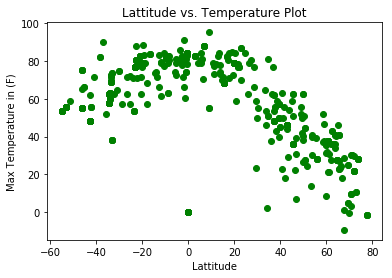

In [23]:
x = df['Lat']
y = df['Max Temp']
LatTemp = plt.scatter(x, y, c="green")
plt.title("Lattitude vs. Temperature Plot")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature in (F)")
plt.show()

#### Latitude vs. Humidity Plot

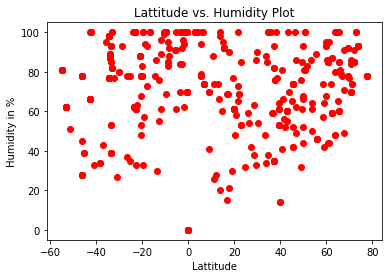

In [25]:
x = df['Lat']
y = df['Humidity']
LatTemp = plt.scatter(x, y, c="red")
plt.title("Lattitude vs. Humidity Plot")
plt.xlabel("Lattitude")
plt.ylabel("Humidity in %")
plt.show()

#### Latitude vs. Cloudiness Plot

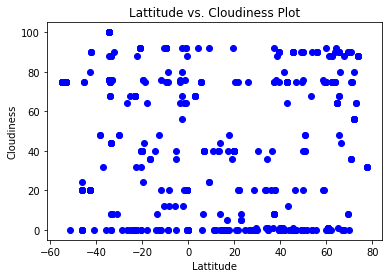

In [27]:
x = df['Lat']
y = df['Cloudiness']
LatTemp = plt.scatter(x, y, c="blue")
plt.title("Lattitude vs. Cloudiness Plot")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

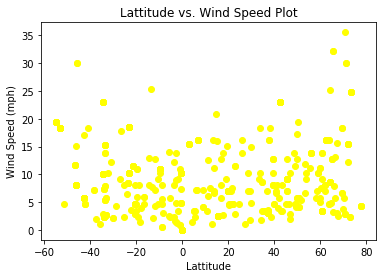

In [28]:
x = df['Lat']
y = df['Wind Speed']
LatTemp = plt.scatter(x, y, c="yellow")
plt.title("Lattitude vs. Wind Speed Plot")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.show()